In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [60]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [61]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [70]:
# to know Summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [71]:
#  LoanAmount: 22 missing values
# Loan_Amount_Term : 14 missing
# Credit_History : 50 missing
# 84% have credit History
# using mean & 50% value we can figure out any skew in data.
# ApplicantIncome is inline with expectation . same for CoApplicantIncome


In [72]:
# for non-numerical columsn, we can look freq dist to understand they make
# sence or not

df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [73]:
614-233-202-179 # thus no missing for property area

0

In [74]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [75]:
614-489-112 # 13 missing for Gender

13

In [76]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [77]:
614-475-89 # 50 missing for credit history

50

# Distribution Analysis

In [78]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

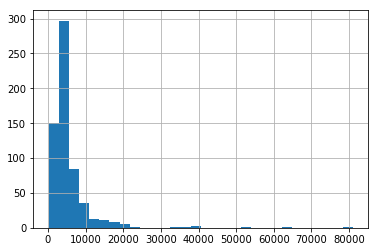

In [79]:
df['ApplicantIncome'].hist(bins=30)

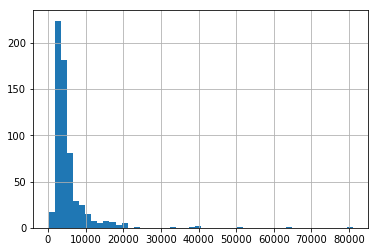

In [80]:
df['ApplicantIncome'].hist(bins=50)

In [81]:
# there are few extreme values in ApplicantIncome

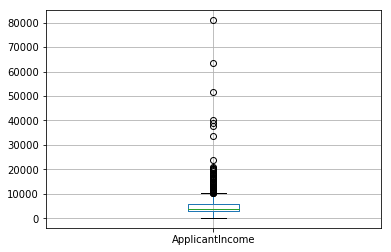

In [82]:
df.boxplot(column='ApplicantIncome')

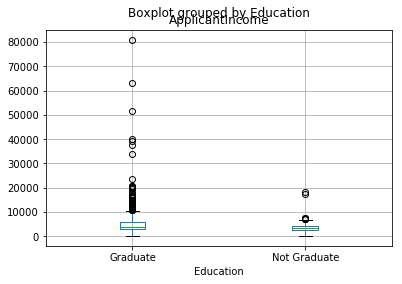

In [83]:
# lots of outlier/extreme values. may be due to income disparity in scoiety 
# or people with diff education levels
# let's segregate by Education
df.boxplot(column='ApplicantIncome', by ='Education')

In [84]:
# mean of graduate & non graduate are very similar. but there graduate 
# people have high incomes which appearing to be the outliers

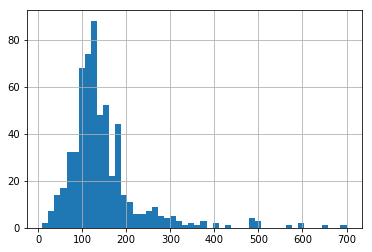

In [85]:
df['LoanAmount'].hist(bins=50)

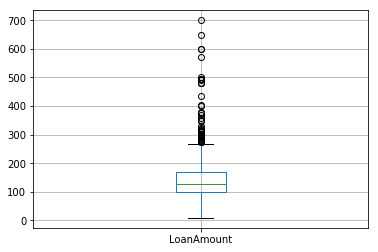

In [86]:
df.boxplot(column='LoanAmount')

In [87]:
# Loan amount also has extreme values  and missing values
# both ApplicantIncome & LoanAmount req data munging

In [88]:
tmp1 = df['Credit_History'].value_counts(ascending=True)
tmp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [89]:
tmp2 = df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc = lambda x:x.map({'Y':1, 'N':0}).mean())
tmp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


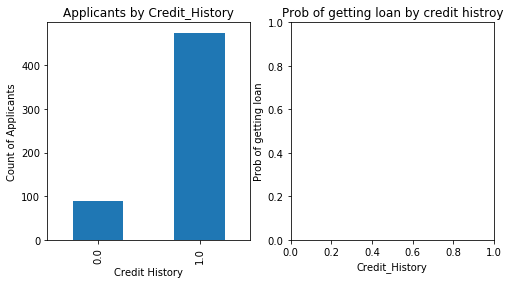

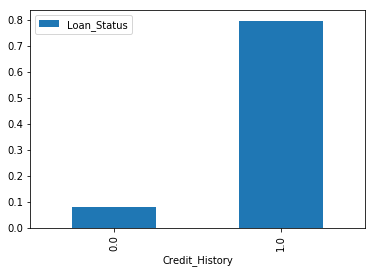

In [90]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title('Applicants by Credit_History')
tmp1.plot(kind ='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Prob of getting loan')
ax2.set_title('Prob of getting loan by credit histroy')
tmp2.plot(kind='bar')

In [91]:
# this shows people with Credit_history have chance of getting loan are 8 times more

In [92]:
tmp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
tmp3

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


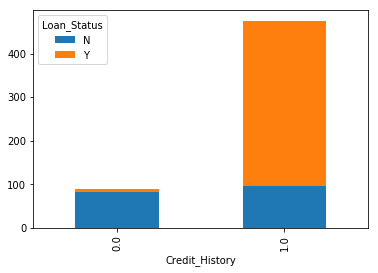

In [93]:
tmp3.plot(kind='bar', stacked =True)

In [94]:
pd.crosstab([df['Credit_History'], df['Gender']], df['LoanAmount'])

LoanAmount             9.0    17.0   25.0   26.0   30.0   35.0   36.0   40.0   \
Credit_History Gender                                                           
0.0            Female      0      0      0      0      0      0      0      0   
               Male        0      0      0      0      0      0      0      0   
1.0            Female      1      0      0      0      1      0      1      1   
               Male        0      1      2      1      1      1      0      1   

LoanAmount             42.0   44.0   ...    400.0  405.0  436.0  480.0  490.0  \
Credit_History Gender                ...                                        
0.0            Female      0      0  ...        0      0      0      0      0   
               Male        0      0  ...        0      0      0      0      0   
1.0            Female      0      1  ...        0      0      0      0      0   
               Male        1      1  ...        1      1      1      2      1   

LoanAmount             495.0  496.0  500.0  570.0  600.0  
Credit_History Gender                                     
0.0            Female      0      0      0      0      0  
               Male        1      0      0      0      1  
1.0            Female      0      1      0      0      1  
               Male        0      0      1      1      0  

[4 rows x 190 columns]

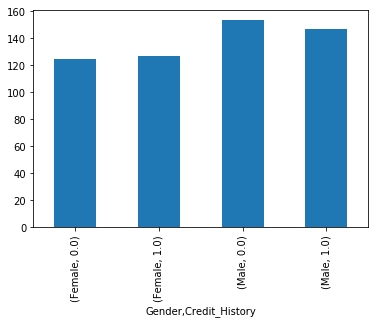

In [95]:
df.groupby(['Gender', 'Credit_History']).mean()['LoanAmount'].plot(kind='bar')

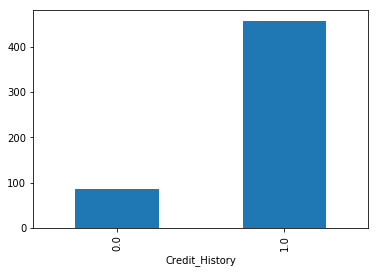

In [96]:
df.groupby(['Credit_History']).count()['LoanAmount'].plot(kind='bar')

In [97]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [98]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

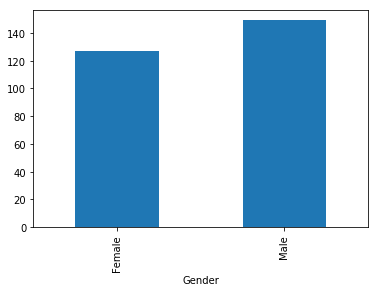

In [99]:
df.groupby(['Gender']).mean()['LoanAmount'].plot.bar()

In [100]:
df.groupby('Gender')

In [101]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [102]:
df[(df['Gender']=='Female') & (df['Education']== 'Not Graduate')].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
50,LP001155,Female,Yes,0,Not Graduate,No,1928,1644.0,100.0,360.0,1.0,Semiurban,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
205,LP001692,Female,No,0,Not Graduate,No,4408,0.0,120.0,360.0,1.0,Semiurban,Y
279,LP001908,Female,Yes,0,Not Graduate,No,4100,0.0,124.0,360.0,NaN,Rural,Y
338,LP002113,Female,No,3+,Not Graduate,No,1830,0.0,NaN,360.0,0.0,Urban,N


In [103]:
df.pivot_table(values='LoanAmount', index = ['Gender', 'Married', 'Self_Employed'])

LoanAmount
Gender Married Self_Employed            
Female No      No             110.596774
               Yes            125.800000
       Yes     No             135.480000
               Yes            282.250000
Male   No      No             128.137255
               Yes            173.625000
       Yes     No             151.709220
               Yes            169.355556

In [104]:
df.pivot_table(values='LoanAmount', index = ['Gender', 'Married'], columns='Self_Employed')

Self_Employed           No         Yes
Gender Married                        
Female No       110.596774  125.800000
       Yes      135.480000  282.250000
Male   No       128.137255  173.625000
       Yes      151.709220  169.355556

In [105]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [106]:
# to get in percentage
def percConvert(row_value):
    return row_value/float(row_value[-1])
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True).apply(percConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


In [107]:
pd.crosstab(df['Credit_History'], df['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


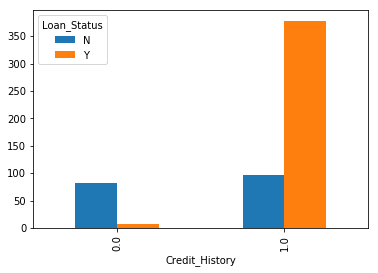

In [108]:
pd.crosstab(df['Credit_History'], df['Loan_Status']).plot(kind='bar')

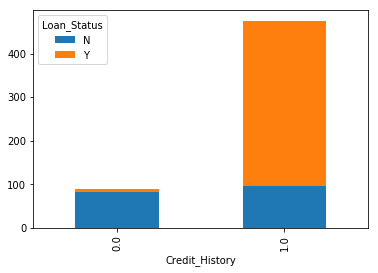

In [109]:
pd.crosstab(df['Credit_History'], df['Loan_Status']).plot(kind='bar', stacked=True)

In [110]:
df.apply(lambda x:sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [111]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [112]:
df['Self_Employed'].value_counts()/582

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [113]:
#If we put 'NO' in Self_Employed we are 86% true
df['Self_Employed'].fillna('No', inplace=True)

In [114]:
# filling na value of LoanAMount
#1st method: using mean
#df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace =True)

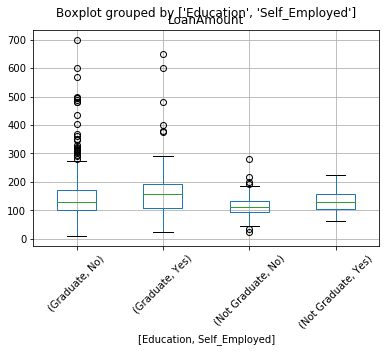

In [115]:
# 2nd method: based on person is educated or self-employed combinedly we can
# estimate LoanAmount
# 1st check out our assumption is true or not using BOX plot
#table = df[['Education', 'Self_Employed', 'LoanAmount']].groupby(['Education', 'Self_Employed'])
df.boxplot(by=['Education', 'Self_Employed'], column='LoanAmount', rot=45)

In [116]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', 
                       aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [117]:
def pred_LoanAMount(x):
    return table.loc[x['Self_Employed'], x['Education']]

In [118]:
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(pred_LoanAMount, axis=1), inplace=True )

# Deal with extreme values

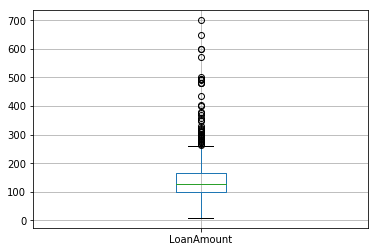

In [119]:
df.boxplot(column='LoanAmount')

In [120]:
# we can use log transfomation to treat extreme values
# instead of treating them as outliers
df['LoanAmount_log']=np.log(df['LoanAmount'])

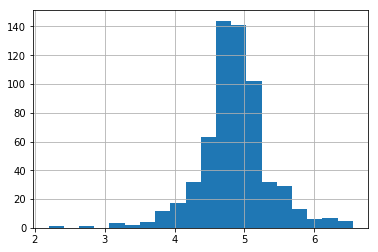

In [121]:
df['LoanAmount_log'].hist(bins=20)

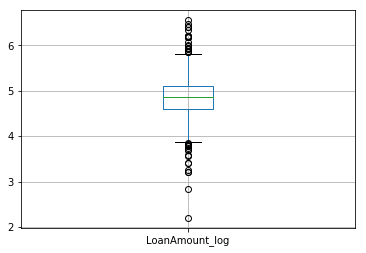

In [122]:
df.boxplot(column='LoanAmount_log')

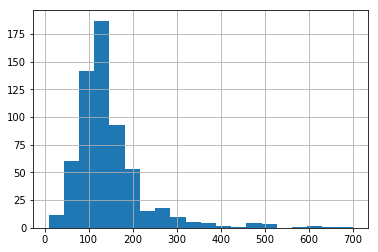

In [123]:
df['LoanAmount'].hist(bins=20)

In [124]:
#for predicting loan_status, total income is more important
#than Applicant & coApplicant income
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

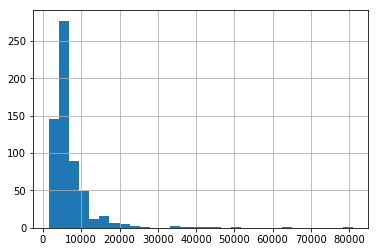

In [125]:
df['TotalIncome'].hist(bins=30)

In [126]:
# there are extreme values, again do log transformation
df['TotalIncome_log']=np.log(df['TotalIncome'])

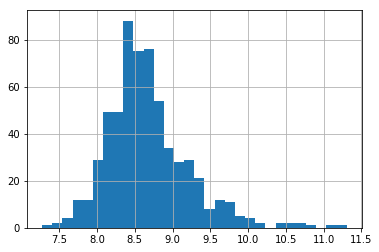

In [127]:
df['TotalIncome_log'].hist(bins=30)

In [128]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [129]:
df['Gender'].value_counts()/601

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [130]:
df['Gender'].fillna('Male', inplace=True)

In [131]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [132]:
df['Married'].value_counts()/611

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [133]:
# for Married only 3 values are missing
df['Married'].fillna('Yes', inplace=True)

In [134]:
df['Dependents'].value_counts()/599

0     0.601002
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

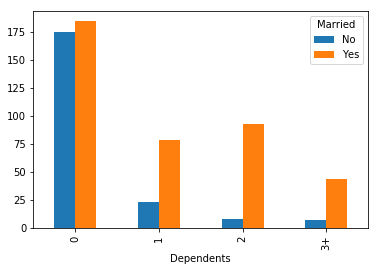

In [135]:
pd.crosstab(df['Dependents'], df['Married']).plot(kind='bar')

In [136]:
df[df['Dependents'].isnull()].groupby('Married').count()

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
Married,,,,,,,,,,,,,,,


In [137]:
df[df['Dependents'].isnull()].groupby('Married').count()/15

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
Married,,,,,,,,,,,,,,,


In [138]:
df['Property_Area'].tail()

609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, dtype: object

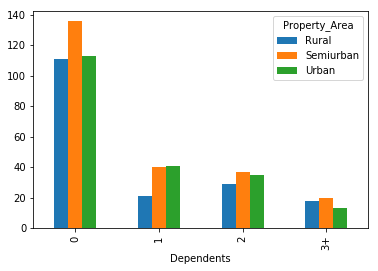

In [139]:
pd.crosstab(df['Dependents'], df['Property_Area']).plot(kind='bar')

In [140]:
# this doesn't make much sense as pattern are similar over 
#different dependents  and property_area

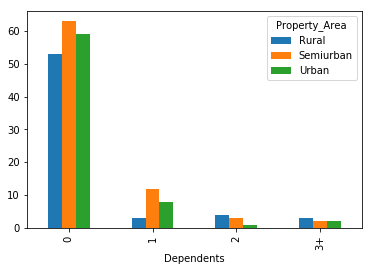

In [141]:
df_married = df[df['Married']=='No']
pd.crosstab(df_married['Dependents'], df_married['Property_Area']).plot(kind='bar')

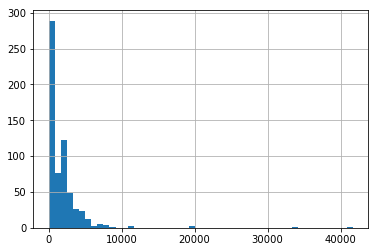

In [142]:
df['CoapplicantIncome'].hist(bins=50)

In [143]:
df['CoapplicantIncome_flag']=df['CoapplicantIncome'].apply(lambda x: 0 if x==0 else 1 )

In [144]:
df[['CoapplicantIncome', 'CoapplicantIncome_flag']].head()

,CoapplicantIncome,CoapplicantIncome_flag
0,0.0,0
1,1508.0,1
2,0.0,0
3,2358.0,1
4,0.0,0


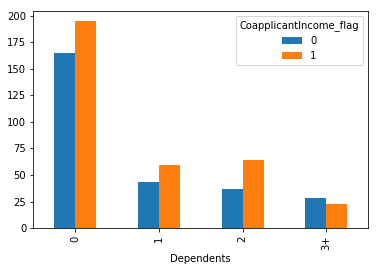

In [145]:
pd.crosstab(df['Dependents'], df['CoapplicantIncome_flag']).plot(kind='bar')

In [146]:
df['Dependents'].fillna('0', inplace=True)

In [147]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [148]:
df['Loan_Amount_Term'].head()

0    360.0
1    360.0
2    360.0
3    360.0
4    360.0
Name: Loan_Amount_Term, dtype: float64

In [149]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

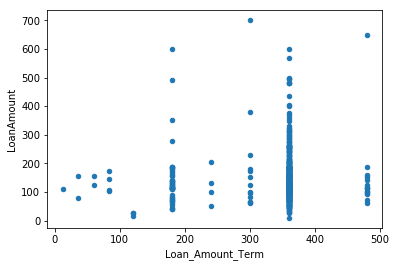

In [150]:
df[['Loan_Amount_Term', 'LoanAmount']].plot(kind='scatter', x='Loan_Amount_Term', y='LoanAmount')

In [151]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log',
       'CoapplicantIncome_flag'],
      dtype='object')

In [152]:
df['Amount_by_income']= df['LoanAmount']/df['TotalIncome']

In [154]:
df['Amount_by_income'].head()

0    0.022226
1    0.021015
2    0.022000
3    0.024287
4    0.023500
Name: Amount_by_income, dtype: float64

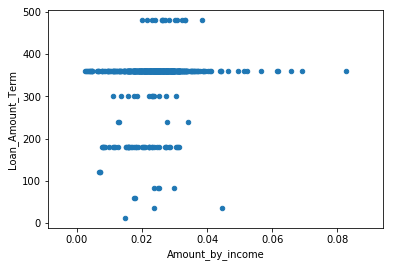

In [156]:
df.plot(kind='scatter', x='Amount_by_income', y='Loan_Amount_Term')

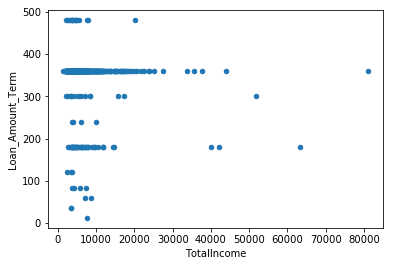

In [158]:
df.plot(kind='scatter', x='TotalIncome', y='Loan_Amount_Term')

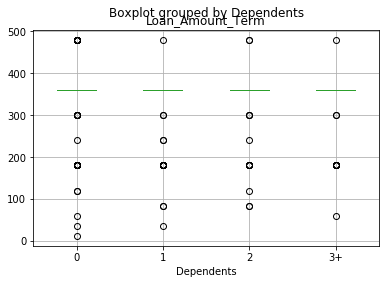

In [165]:
df.boxplot(by='Dependents', column='Loan_Amount_Term')

In [166]:
df['Loan_Amount_Term'].value_counts()/600

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [167]:
df['Loan_Amount_Term'].fillna(360.0,  inplace=True)

In [168]:
df.apply(lambda x:sum(x.isnull()), axis=0)

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History            50
Property_Area              0
Loan_Status                0
LoanAmount_log             0
TotalIncome                0
TotalIncome_log            0
CoapplicantIncome_flag     0
Amount_by_income           0
dtype: int64

In [169]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [178]:
df['Credit_History'].value_counts()/(475+89)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

In [176]:
tmp =pd.crosstab(index=df['Education'], columns=df['Credit_History'], margins=True)
tmp

Credit_History,0.0,1.0,All
Education,,,
Graduate,63,380,443
Not Graduate,26,95,121
All,89,475,564


In [177]:
tmp.apply(percConvert, axis=1)

Credit_History,0.0,1.0,All
Education,,,
Graduate,0.142212,0.857788,1.0
Not Graduate,0.214876,0.785124,1.0
All,0.157801,0.842199,1.0


In [179]:
# can't decide on basis of Education
df['Credit_History'].fillna(1.0, inplace=True)


In [181]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [182]:
df.apply(lambda x:sum(x.isnull()), axis=0)

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status               0
LoanAmount_log            0
TotalIncome               0
TotalIncome_log           0
CoapplicantIncome_flag    0
Amount_by_income          0
dtype: int64

In [185]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,CoapplicantIncome_flag,Amount_by_income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.764658,342.410423,0.855049,4.857146,7024.705081,8.669414,0.555375,0.023868
std,6109.041673,2926.248369,84.145700,64.428629,0.352339,0.496392,6458.663872,0.545102,0.497329,0.008668
min,150.000000,0.000000,9.000000,12.000000,0.000000,2.197225,1442.000000,7.273786,0.000000,0.002523
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4.607658,4166.000000,8.334712,0.000000,0.019202
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,4.852030,5416.500000,8.597205,1.000000,0.024069
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,5.104426,7521.750000,8.925549,1.000000,0.028233
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080,81000.000000,11.302204,1.000000,0.082712


In [186]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log',
       'CoapplicantIncome_flag', 'Amount_by_income'],
      dtype='object')

# Model building

In [189]:
# converting all categorical input to numeric
from sklearn.preprocessing import LabelEncoder
var_list = ['Gender', 'Married', 'Dependents', 'Education',
           'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for var in var_list:
    df[var]=le.fit_transform(df[var])
df.dtypes


Loan_ID                    object
Gender                      int64
Married                     int64
Dependents                  int64
Education                   int64
Self_Employed               int64
ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Property_Area               int64
Loan_Status                 int64
LoanAmount_log            float64
TotalIncome               float64
TotalIncome_log           float64
CoapplicantIncome_flag      int64
Amount_by_income          float64
dtype: object

import lib & writing a general function

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


In [199]:
#Generic function for making a classification model and 
#accessing performance:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors], data[outcome])
    predictions=model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Accuracy: %s" % "{0:.3%}".format(accuracy))
    # Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error=[]
    for train, test in kf:
        train_predictors=(data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        # Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test, :],
                                data[outcome].iloc[test]))
        
    print('Cross-Validation Score: %s' % '{0:.3%}'.format(np.mean(error)))
    
    #fit the model again so that it can be refered outside the func
    model.fit(data[predictors], data[outcome])

Logistic Regression

In [200]:
outcome_var = 'Loan_Status'
model=LogisticRegression()
predictor_var=['Credit_History']
classification_model(model, df, predictor_var, outcome_var)

Accuracy: 80.945%
Cross-Validation Score: 80.946%


In [202]:
# with more variable
predictor_var=['Credit_History','Education', 'Married', 'Self_Employed', 'Property_Area']
classification_model(model, df, predictor_var, outcome_var)

Accuracy: 80.945%
Cross-Validation Score: 80.946%


Accuracy is not improving much, we have to use feature engineering

Try some other modeling techniques

Decision Tree

In [204]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 80.945%
Cross-Validation Score: 80.946%


Again same accuracy as Credit_HIstory is dominating

In [207]:
# let's try with numerical variables
predictor_var=['Credit_History', 'Loan_Amount_Term', 'LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 88.925%
Cross-Validation Score: 69.536%


In [208]:
# overfitting occured

Random Forest

An advantage with Random Forest is that we can make it work with all the features and it returns a feature importance matrix which can be used to select features.

In [211]:
model = RandomForestClassifier(n_estimators=100)
predictor_var=['Gender', 'Married', 'Dependents', 'Education',
              'Self_Employed', 'Loan_Amount_Term', 'Credit_History',
              'Property_Area', 'LoanAmount_log', 'TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 100.000%
Cross-Validation Score: 77.200%


Overfitting occurs. can be avoid by 
1) Reducing no of predictors
2) tuning the model parameters

Feature important matrix:

In [215]:
featimp=pd.Series(model.feature_importances_, index=
                  predictor_var).sort_values(ascending=False)
featimp

Credit_History      0.275365
TotalIncome_log     0.262754
LoanAmount_log      0.229617
Dependents          0.050185
Property_Area       0.047585
Loan_Amount_Term    0.045576
Education           0.023582
Married             0.023564
Self_Employed       0.021578
Gender              0.020194
dtype: float64

In [216]:
model=RandomForestClassifier(n_estimators=100)
predictor_var=['Credit_History', 'TotalIncome_log', 'LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 100.000%
Cross-Validation Score: 76.549%


In [217]:
model=RandomForestClassifier(n_estimators=100)
predictor_var=['Credit_History', 'TotalIncome_log', 'LoanAmount_log',
              'Dependents', 'Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 100.000%
Cross-Validation Score: 78.667%


In [218]:
model=RandomForestClassifier(n_estimators=25)
predictor_var=['Credit_History', 'TotalIncome_log', 'LoanAmount_log',
              'Dependents', 'Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 100.000%
Cross-Validation Score: 77.036%


In [220]:
model=RandomForestClassifier(n_estimators=25, min_samples_split=25)
predictor_var=['Credit_History', 'TotalIncome_log', 'LoanAmount_log',
              'Dependents', 'Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 83.225%
Cross-Validation Score: 80.458%


In [221]:
model=RandomForestClassifier(n_estimators=100, min_samples_split=25)
predictor_var=['Credit_History', 'TotalIncome_log', 'LoanAmount_log',
              'Dependents', 'Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 83.713%
Cross-Validation Score: 80.622%


In [222]:
model=RandomForestClassifier(n_estimators=25, min_samples_split=25, 
                            max_depth=7)
predictor_var=['Credit_History', 'TotalIncome_log', 'LoanAmount_log',
              'Dependents', 'Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 82.899%
Cross-Validation Score: 80.622%


In [223]:
model=RandomForestClassifier(n_estimators=25, min_samples_split=25, 
                            max_depth=7, max_features=1)
predictor_var=['Credit_History', 'TotalIncome_log', 'LoanAmount_log',
              'Dependents', 'Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 82.899%
Cross-Validation Score: 80.460%
